## Lección 3: Distribución de Probabilidad

### 1. Identificación de Distribuciones según el Tipo de Variable

Para modelar matemáticamente los hábitos de los estudiantes, debemos asignar una distribución teórica de probabilidad a cada variable de estudio. La elección depende de si la variable representa una medición (continua) o un conteo/categoría (discreta).

#### A. Distribuciones Continuas (Variables de Razón)
Se aplican a variables que pueden tomar cualquier valor dentro de un intervalo.

* **Horas de Sueño:** Se modela mediante una **Distribución Normal** (Campana de Gauss). El tiempo es una variable continua y, biológicamente, los hábitos de sueño en una población tienden a concentrarse alrededor de una media, con una caída simétrica hacia los extremos (pocas personas duermen 3 horas, pocas duermen 12).
* **Minutos de Actividad Física:** También se asume una **Distribución Normal**. 

> **Nota Crítica Metodológica:** En la práctica real, los minutos de ejercicio suelen presentar un sesgo a la derecha (muchos estudiantes sedentarios cerca del 0 y pocos atletas con tiempos muy altos). Sin embargo, para efectos de aplicar pruebas paramétricas en este nivel, asumimos normalidad basándonos en el tamaño de la muestra ($n \geq 30$) que nos permite flexibilizar este supuesto.



#### B. Distribuciones Discretas (Conteo y Dicotómicas)
Se aplican a variables que solo pueden tomar valores enteros aislados.

* **Frecuencia de Consumo de Ultraprocesados:** Se modela con una **Distribución de Poisson**. Es la distribución ideal porque mide el número de veces que ocurre un evento discreto (comer comida chatarra) en un intervalo de tiempo fijo y continuo (una semana).
* **Cumplimiento de Hábitos (Variable Dicotómica):** Si evaluamos a un estudiante únicamente bajo el criterio de "Cumple" (ej. consume ultraprocesados $\leq 3$ veces) o "No cumple", aplicamos una **Distribución Binomial**. Es el modelo correcto para analizar la proporción de éxitos/fracasos en una muestra fija de $n$ ensayos independientes.

### 2. Justificación de las Funciones de Distribución Elegidas

La selección de estos modelos matemáticos no es arbitraria; responde a la naturaleza empírica de los datos y a los requisitos para realizar inferencia estadística válida:

#### A. Distribución Normal (Horas de Sueño y Minutos de Ejercicio)
* **Naturaleza del fenómeno:** Las variables continuas relacionadas con la biología humana (como el sueño) tienden a agruparse de forma simétrica alrededor de un valor central (la media poblacional), disminuyendo la frecuencia hacia los extremos.
* **Aplicación práctica:** Aunque los minutos de ejercicio pueden presentar cierta asimetría positiva en la realidad (muchos estudiantes sedentarios cerca del 0 y una cola larga hacia la derecha con los más atléticos), el tamaño de nuestra muestra ($n=385 \geq 30$) nos permite asumir normalidad gracias al **Teorema del Límite Central**. Esto facilita la aplicación posterior de pruebas paramétricas (Z o t-Student).


#### B. Distribución de Poisson (Frecuencia de Ultraprocesados)
* **Eventos en un intervalo definido:** Es el modelo exacto para contar la frecuencia de aparición de un evento discreto (consumir comida rápida) dentro de una unidad continua de tiempo (una semana).
* **Independencia:** Trabaja bajo el supuesto de que el consumo de un día no condiciona de forma absoluta el del día siguiente, agrupando el comportamiento en torno a una tasa de ocurrencia promedio ($\lambda$).

#### C. Distribución Binomial (Cumplimiento de Hábitos)
* **Condición dicotómica:** Al momento de evaluar si un estudiante cumple o no con las recomendaciones (ej. ¿Duerme más de 7 horas? Sí/No), la variable se transforma en un ensayo de Bernoulli.
* **Múltiples ensayos:** Al analizar a los 385 estudiantes en conjunto, tenemos un número fijo de ensayos ($n$) independientes entre sí, cada uno con una probabilidad de "éxito" ($p$), cumpliendo los postulados exactos del modelo binomial.

---

### 3. Cálculo de Probabilidades para Variables Clave (Software)

Utilizaremos la librería `scipy.stats` de Python para responder preguntas concretas sobre el riesgo en nuestra población estudiantil, aplicando los modelos matemáticos justificados en el paso anterior. Los parámetros (medias y desviaciones) se extraerán directamente de nuestra muestra recolectada ($n=385$).

#### A. Probabilidad Normal (Horas de Sueño)
**Pregunta:** Si elegimos a un estudiante al azar, ¿cuál es la probabilidad teórica de que duerma menos de las 7 horas recomendadas?
* **Modelo:** $X \sim N(\mu, \sigma^2)$
* **Función:** CDF (Función de Distribución Acumulada), que calcula el área bajo la curva desde el extremo izquierdo hasta el valor de corte (7).

#### B. Probabilidad Poisson (Consumo de Ultraprocesados)
**Pregunta:** ¿Cuál es la probabilidad de que un estudiante consuma comida rápida exactamente 0 veces en una semana (dieta estricta) o que supere el límite de riesgo (> 3 veces)?
* **Modelo:** $X \sim Poisson(\lambda)$
* **Función:** PMF (Función de Masa de Probabilidad) para valores exactos y CDF para rangos acumulados.

#### C. Probabilidad Binomial (Cumplimiento de Metas)
**Pregunta:** Si tomamos un pequeño grupo de estudio de 10 estudiantes al azar, ¿cuál es la probabilidad de que exactamente la mitad (5) cumpla con la meta de actividad física?
* **Modelo:** $X \sim Binomial(n, p)$
* **Función:** PMF. Donde $n=10$ y $p$ es la proporción de estudiantes en nuestra muestra global que logran la meta.

In [2]:
import pandas as pd
import scipy.stats as stats

# 1. Cargar la base de datos real simulada
df_muestra = pd.read_csv('Muestra_universidad.csv')

# A. Distribución Normal (Sueño)
# Extraemos los parámetros empíricos de la muestra
mu_sueno = df_muestra['Horas_Sueno'].mean()
sigma_sueno = df_muestra['Horas_Sueno'].std()

# Calculamos P(X < 7) usando la función de distribución acumulada (cdf)
prob_sueno_menor_7 = stats.norm.cdf(7, loc=mu_sueno, scale=sigma_sueno)
print("--- DISTRIBUCIÓN NORMAL (SUEÑO) ---")
print(f"Media muestral: {mu_sueno:.2f}h | Desviación: {sigma_sueno:.2f}h")
print(f"Probabilidad de que un alumno duerma menos de 7 horas: {prob_sueno_menor_7:.4f} ({prob_sueno_menor_7*100:.1f}%)\n")

# B. Distribución de Poisson (Ultraprocesados)
# El parámetro lambda (tasa media) es el promedio de veces a la semana
lambda_ultra = df_muestra['Veces_Ultraprocesados'].mean()

# Calculamos P(X = 0) usando la función de masa de probabilidad (pmf)
prob_cero_ultra = stats.poisson.pmf(0, mu=lambda_ultra)

# Calculamos P(X > 3) = 1 - P(X <= 3)
prob_mas_de_tres = 1 - stats.poisson.cdf(3, mu=lambda_ultra)

print("--- DISTRIBUCIÓN DE POISSON (ULTRAPROCESADOS) ---")
print(f"Tasa promedio (Lambda): {lambda_ultra:.2f} veces/semana")
print(f"Probabilidad de consumir 0 veces: {prob_cero_ultra:.4f} ({prob_cero_ultra*100:.1f}%)")
print(f"Probabilidad de riesgo (>3 veces): {prob_mas_de_tres:.4f} ({prob_mas_de_tres*100:.1f}%)\n")

# C. Distribución Binomial (Ejercicio en un subgrupo)
# Probabilidad de éxito 'p': proporción de alumnos que hacen >= 150 min
p_ejercicio = (df_muestra['Minutos_Ejercicio'] >= 150).mean()
n_ensayos = 10 # Grupo pequeño de 10 alumnos
k_exitos = 5   # Queremos saber la prob. de que exactamente 5 cumplan

# Calculamos P(X = 5)
prob_binom = stats.binom.pmf(k_exitos, n_ensayos, p_ejercicio)

print("--- DISTRIBUCIÓN BINOMIAL (EJERCICIO) ---")
print(f"Probabilidad de éxito (p): {p_ejercicio:.2f}")
print(f"En un grupo de 10 alumnos, la prob. de que exactamente 5 cumplan la meta es: {prob_binom:.4f} ({prob_binom*100:.1f}%)")

--- DISTRIBUCIÓN NORMAL (SUEÑO) ---
Media muestral: 6.51h | Desviación: 1.14h
Probabilidad de que un alumno duerma menos de 7 horas: 0.6647 (66.5%)

--- DISTRIBUCIÓN DE POISSON (ULTRAPROCESADOS) ---
Tasa promedio (Lambda): 3.97 veces/semana
Probabilidad de consumir 0 veces: 0.0189 (1.9%)
Probabilidad de riesgo (>3 veces): 0.5604 (56.0%)

--- DISTRIBUCIÓN BINOMIAL (EJERCICIO) ---
Probabilidad de éxito (p): 0.39
En un grupo de 10 alumnos, la prob. de que exactamente 5 cumplan la meta es: 0.1917 (19.2%)


### 4. Visualización de las Distribuciones

Para contrastar el comportamiento empírico de nuestra muestra frente a los modelos teóricos elegidos, graficamos las tres variables principales. 

Se han incorporado líneas de corte que representan los **umbrales de riesgo** definidos en la Lección 1. Esto permite identificar visualmente la proporción (área bajo la curva o acumulación de barras) de estudiantes que se encuentran fuera de las recomendaciones de salud.

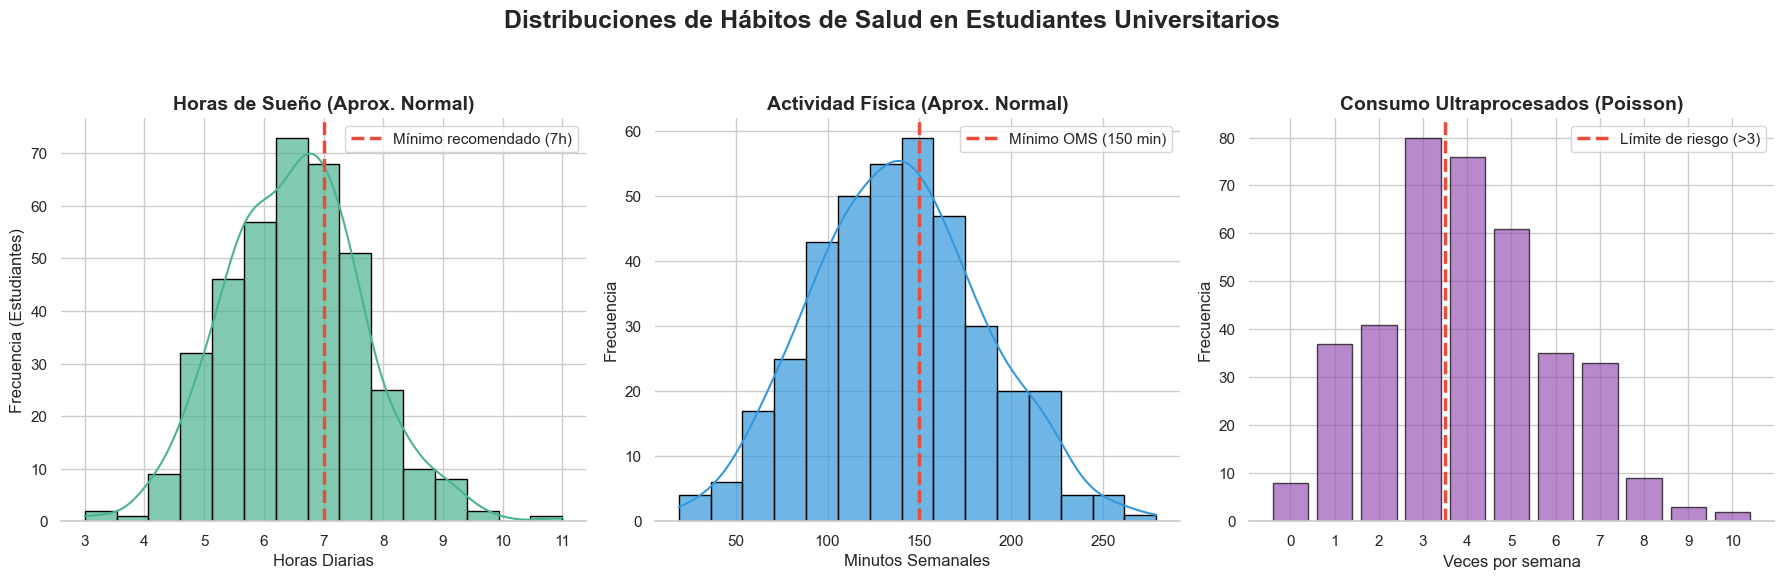

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar la base de datos
df_muestra = pd.read_csv('Muestra_universidad.csv')

# Configuración estética general (estilo limpio)
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(18, 5.5))
fig.suptitle("Distribuciones de Hábitos de Salud en Estudiantes Universitarios", 
             fontsize=18, fontweight='bold', y=1.05)

# 1. Horas de Sueño (Normal)
sns.histplot(df_muestra['Horas_Sueno'], kde=True, color="#4CB391", ax=axes[0], bins=15, edgecolor="black", alpha=0.7)
axes[0].axvline(7, color='#E74C3C', linestyle='--', linewidth=2.5, label='Mínimo recomendado (7h)')
axes[0].set_title('Horas de Sueño (Aprox. Normal)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Horas Diarias', fontsize=12)
axes[0].set_ylabel('Frecuencia (Estudiantes)', fontsize=12)
axes[0].legend()

# 2. Minutos de Ejercicio (Normal)
sns.histplot(df_muestra['Minutos_Ejercicio'], kde=True, color="#3498DB", ax=axes[1], bins=15, edgecolor="black", alpha=0.7)
axes[1].axvline(150, color='#E74C3C', linestyle='--', linewidth=2.5, label='Mínimo OMS (150 min)')
axes[1].set_title('Actividad Física (Aprox. Normal)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Minutos Semanales', fontsize=12)
axes[1].set_ylabel('Frecuencia', fontsize=12)
axes[1].legend()

# 3. Consumo de Ultraprocesados (Poisson)
# Al ser una variable discreta, usamos un gráfico de barras exactas
counts = df_muestra['Veces_Ultraprocesados'].value_counts().sort_index()
axes[2].bar(counts.index, counts.values, color="#9B59B6", edgecolor="black", alpha=0.7)
axes[2].axvline(3.5, color='#E74C3C', linestyle='--', linewidth=2.5, label='Límite de riesgo (>3)')
axes[2].set_title('Consumo Ultraprocesados (Poisson)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Veces por semana', fontsize=12)
axes[2].set_ylabel('Frecuencia', fontsize=12)
axes[2].set_xticks(range(int(df_muestra['Veces_Ultraprocesados'].max()) + 1))
axes[2].legend()

# Limpiar bordes innecesarios para un look más moderno
sns.despine(left=True)
plt.tight_layout()
plt.show()